<a href="https://colab.research.google.com/github/PisutSukpool/BADS7105-CRM-analytics-and-intelligence/blob/main/Homework%2007/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta 
from datetime import datetime,date   
from matplotlib.ticker import PercentFormatter
import copy
import matplotlib as mpl

df = pd.read_csv('/content/drive/My Drive/BADS_NIDA/CRM/hw7_product_recommendation/survey_product_recommendation.csv')
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

df.head()

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,3/20/2021 11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,3/20/2021 11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,3/20/2021 11:54:05,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,3/20/2021 11:54:13,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,3/20/2021 11:54:18,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [55]:
mapper = {'เคย' : 1 ,'ไม่เคย' : 0 }
df_encode = df.replace(mapper)
df_encode = df_encode.drop(columns=['ประทับเวลา'])
df_encode_fillna = df_encode.fillna(0)
df_encode_fillna.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0.0,1,0,1,0.0,0,0,0,1.0,0,0.0,1,0,1,1,1


# **Association Rule**

In [56]:
df_market_basket = df_encode_fillna
mapper = {1 : True ,0 : False }
df_market_basket_rep = df_market_basket.replace(mapper)
df_market_basket_rep

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,True,True,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,True,False,True,False,False,False,True,False,False,False,False,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,True,True,False,True,False,True,False,False,False,True,True,False,True,False,True
2,True,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,True,True,True,False,True,True,False,True,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True,True,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,True,False,True,True,True
3,False,False,False,True,False,True,False,False,False,False,True,True,True,True,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,False,False,True,True,False,True,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,True,True
5,True,True,False,False,False,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,True,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True
6,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,True,False,True,True,False,False,False,False,True,False,True,True,False,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,True,True,True
7,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False,True,False,True,False,False,True,True,True,True,False,False,False,True,True,False,True,True,False,True,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,True
9,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,False,True,False,True,False,

In [57]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets_ap = apriori(df_market_basket_rep, min_support=0.5, use_colnames=True)

In [58]:
print(frequent_itemsets_ap)

       support                                           itemsets
0     0.543478                                         (คอลลาเจน)
1     0.717391                                 (ต้นไม้ประดับห้อง)
2     0.869565                                         (หมอนข้าง)
3     0.673913                                          (ตาชั่ง )
4     0.934783                                     (กะหรี่(ปั๊บ))
...        ...                                                ...
5834  0.500000  (เม็ดมะม่วงหิมพานต์, ชาบู, หมอนข้าง, หมูแดดเดี...
5835  0.500000  (เม็ดมะม่วงหิมพานต์, ชาบู, หมอนข้าง, แฟน ที่แป...
5836  0.521739  (เม็ดมะม่วงหิมพานต์, ชาบู, หมอนข้าง, หมูแดดเดี...
5837  0.521739  (เม็ดมะม่วงหิมพานต์, ชาบู, หมอนข้าง, หมูแดดเดี...
5838  0.500000  (เม็ดมะม่วงหิมพานต์, ชาบู, หมูแดดเดียว, แฟน ที...

[5839 rows x 2 columns]


In [59]:
rules = association_rules(frequent_itemsets_ap,metric='lift',min_threshold=1)
rules['Interest'] = rules['confidence'] - rules['consequent support']
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Interest
0,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.934783,0.543478,0.521739,0.558140,1.026977,0.013705,1.033181,0.014661
1,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.543478,0.934783,0.521739,0.960000,1.026977,0.013705,1.630435,0.025217
2,(กระเป๋า),(คอลลาเจน),1.000000,0.543478,0.543478,0.543478,1.000000,0.000000,1.000000,0.000000
3,(คอลลาเจน),(กระเป๋า),0.543478,1.000000,0.543478,1.000000,1.000000,0.000000,inf,0.000000
4,(ชาบู),(คอลลาเจน),1.000000,0.543478,0.543478,0.543478,1.000000,0.000000,1.000000,0.000000


In [61]:
rules_head = rules[(rules['lift']>=1) & (rules['confidence']>=0.5)]
rules_head["antecedents"] = rules_head["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_head["consequents"] = rules_head["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_head = rules_head.sort_values(by='Interest',ascending=False)

In [65]:
rules_head = rules_head[(rules_head['Interest']==rules_head['Interest'].max())]
rules_head['lift'] = round(rules_head['lift'] ,2)
rules_head

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Interest
245168,เนื้อย่าง,โรตี,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
135182,เนื้อย่าง,กระเป๋า,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
335534,ครีมกันแดด,โรตี,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
334198,หมูแดดเดียว,เม็ดมะม่วงหิมพานต์,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
376241,ชาบู,โรตี,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
...,...,...,...,...,...,...,...,...,...,...
335320,เนื้อย่าง,เม็ดมะม่วงหิมพานต์,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
334141,ชาบู,เม็ดมะม่วงหิมพานต์,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
244381,กระเป๋า,ครีมกันแดด,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159
334772,ครีมกันแดด,กระเป๋า,0.521739,0.652174,0.5,0.958333,1.47,0.159735,8.347826,0.306159


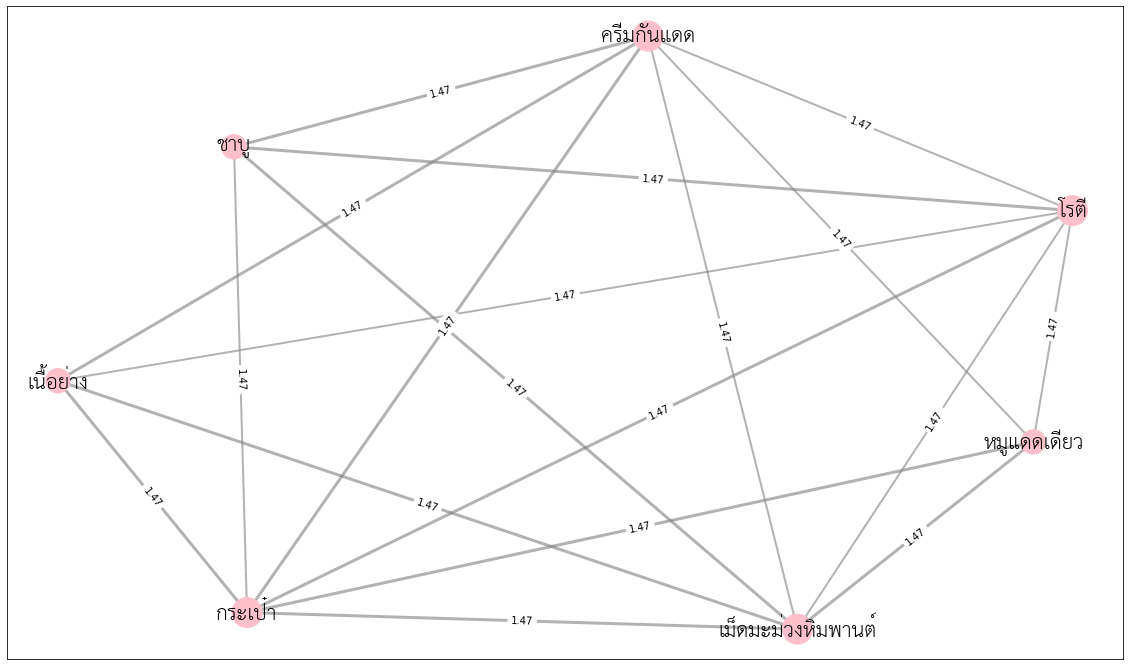

In [66]:
import networkx as nx
plt.figure(3,figsize=(20,12))
GA=nx.from_pandas_edgelist(rules_head,source='antecedents',target='consequents',edge_attr='lift')
pos = nx.spring_layout(GA,k=500)
d = dict(GA.degree)
plt.figure(3,figsize=(20,12))
nx.draw_networkx_nodes(GA, pos,nodelist=d.keys(), node_size=[v * 150 for v in d.values()] ,node_color='pink')
nx.draw_networkx_labels(GA, pos,font_family='TH Sarabun New',font_size=20)
nx.draw_networkx_edges(G = GA, pos = pos, edge_color='gray', alpha=0.6, width=[v * 0.5 for v in d.values()])
edge_labels = nx.get_edge_attributes(GA, "lift")
nx.draw_networkx_edge_labels(GA, pos, edge_labels)
plt.show()